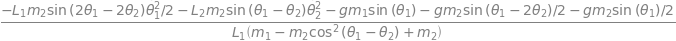

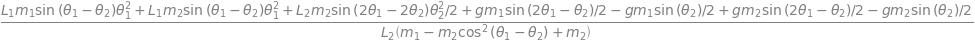

In [3]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()

theta1, theta2 = dynamicsymbols('theta1 theta2')  # 角度
theta1_dot, theta2_dot = dynamicsymbols('theta1 theta2', 1)  # 角速度
theta1_ddot, theta2_ddot = dynamicsymbols('theta1 theta2', 2)  # 角加速度
m1, m2, L1, L2, g = sp.symbols('m1 m2 L1 L2 g')  # 質量、棒の長さ、重力加速度

# 方程式
eq1 = (m1 + m2) * L1 * theta1_ddot + m2 * L2 * theta2_ddot * sp.cos(theta1 - theta2) + m2 * L2 * theta2_dot**2 * sp.sin(theta1 - theta2) + g * (m1 + m2) * sp.sin(theta1)
eq2 = m2 * L2 * theta2_ddot + m2 * L1 * theta1_ddot * sp.cos(theta1 - theta2) - m2 * L1 * theta1_dot**2 * sp.sin(theta1 - theta2) + g * m2 * sp.sin(theta2)

# 連立方程式を解く
solutions = sp.solve([eq1, eq2], (theta1_ddot, theta2_ddot))
display(sp.simplify(solutions[theta1_ddot]))
display(sp.simplify(solutions[theta2_ddot]))

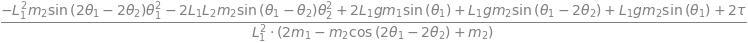

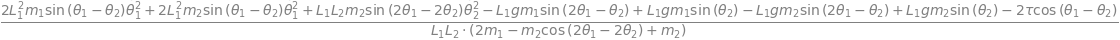

In [4]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols

t = sp.symbols('t')
theta1 = dynamicsymbols('theta1')
theta2 = dynamicsymbols('theta2')
theta1 = theta1
theta2 = theta2
l1, l2, m1, m2, g = sp.symbols('L1 L2 m1 m2 g')

x1 = l1 * sp.sin(theta1)
y1 = l1 * sp.cos(theta1)
x2 = l1 * sp.sin(theta1) + l2 * sp.sin(theta2)
y2 = l1 * sp.cos(theta1) + l2 * sp.cos(theta2)

T1 = m1 * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2) / 2
T2 = m2 * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2) / 2
T = T1 + T2

V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2

L = T - V

lagrange_eq1 = sp.diff(sp.diff(L, sp.diff(theta1, t)), t) - sp.diff(L, theta1)
tau = sp.symbols('tau')
lagrange_eq1 = lagrange_eq1 - tau
lagrange_eq2 = sp.diff(sp.diff(L, sp.diff(theta2, t)), t) - sp.diff(L, theta2)

solutions = sp.solve([lagrange_eq1, lagrange_eq2], [theta1.diff(t, 2), theta2.diff(t, 2)])
F_theta1_ddot = solutions[theta1.diff(t, 2)]
F_theta2_ddot = solutions[theta2.diff(t, 2)]
display(F_theta1_ddot.simplify())
display(F_theta2_ddot.simplify())

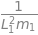

In [5]:
A10 = F_theta1_ddot.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A11 = F_theta1_ddot.diff(theta1.diff(t)).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A12 = F_theta1_ddot.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A13 = F_theta1_ddot.diff(theta2.diff(t)).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])

A30 = F_theta2_ddot.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A31 = F_theta2_ddot.diff(theta1.diff(t)).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A32 = F_theta2_ddot.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
A33 = F_theta2_ddot.diff(theta2.diff(t)).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])

B00 = F_theta1_ddot.diff(tau).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])
B30 = F_theta2_ddot.diff(tau).subs([(theta1, 0), (theta2, 0), (theta1.diff(t), 0), (theta2.diff(t), 0)])

display(A10.simplify())
display(A11.simplify())
display(A12.simplify())
display(A13.simplify())
display(A30.simplify())
display(A31.simplify())
display(A32.simplify())
display(A33.simplify())

display(B00.simplify())
display(B30.simplify())

In [6]:
# 倒立振子で学ぶ制御工学 (3.54) (3.55) に摩擦を追加する

import sympy as sp
import sys
sys.setrecursionlimit(1500)

# 時間変数の定義
t = sp.symbols("t")

# 角度とその時間微分の定義
theta1 = sp.Function("theta1")(t)
theta2 = sp.Function("theta2")(t)
theta1_dot = sp.diff(theta1, t)
theta2_dot = sp.diff(theta2, t)
theta1_ddot = sp.diff(theta1, t, t)
theta2_ddot = sp.diff(theta2, t, t)

# 定数の定義
alpha1, alpha2, alpha3, alpha4, alpha5, mu1, mu2, tau1, f1, f2 = sp.symbols(
    "alpha1 alpha2 alpha3 alpha4 alpha5 mu1 mu2 tau1 f1 f2"
)
theta12 = theta1 - theta2

# 連立方程式の定義
eq1 = sp.Eq(
    alpha1 * theta1_ddot + alpha3 * sp.cos(theta12) * theta2_ddot,
    -alpha3 * theta2_dot**2 * sp.sin(theta12)
    + alpha4 * sp.sin(theta1)
    - (mu1 + mu2) * theta1_dot
    + mu2 * theta2_dot
    + tau1
    - sp.sign(theta1_dot) * f1,
)
eq2 = sp.Eq(
    alpha3 * sp.cos(theta12) * theta1_ddot + alpha2 * theta2_ddot,
    alpha3 * theta1_dot**2 * sp.sin(theta12)
    + alpha5 * sp.sin(theta2)
    + mu2 * theta1_dot
    - mu2 * theta2_dot
    - sp.sign(theta2_dot - theta1_dot) * f2,
)
display(eq1.simplify())
display(eq2.simplify())

                             ⎧                                2               
                             ⎪            - α₃⋅sin(θ₁ - θ₂)⋅θ₂̇  + α₄⋅sin(θ₁) 
                             ⎪                                                
α₁⋅θ₁̈ + α₃⋅cos(θ₁ - θ₂)⋅θ₂̈ = ⎨                    2                f₁⋅θ₁̇   
                             ⎪- α₃⋅sin(θ₁ - θ₂)⋅θ₂̇  + α₄⋅sin(θ₁) - ───── - μ₁
                             ⎪                                     │θ₁̇│      
                             ⎩                                                

                                   
+ μ₂⋅θ₂̇ + τ₁              for θ₁̇ = 0
                                   
                                      
⋅θ₁̇ - μ₂⋅θ₁̇ + μ₂⋅θ₂̇ + τ₁  otherwise 
                                   
                                   

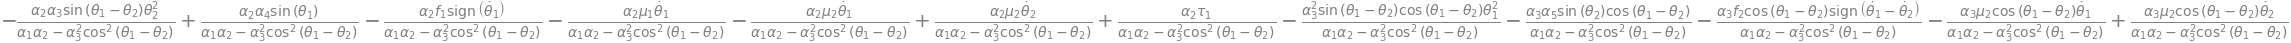

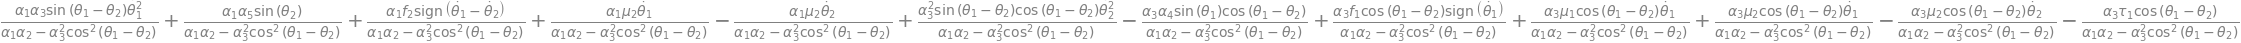

In [7]:
# 連立方程式の解を求める
solutions = sp.solve([eq1, eq2], (theta1_ddot, theta2_ddot))
theta1_ddot_sol = solutions[theta1_ddot]
theta2_ddot_sol = solutions[theta2_ddot]

display(theta1_ddot_sol)
display(theta2_ddot_sol)

In [8]:
# θ=0で線形化すると計算が失敗します。これは動摩擦のsignの非連続の項が存在するためです

A10 = theta1_ddot_sol.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A11 = theta1_ddot_sol.diff(theta1_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A12 = theta1_ddot_sol.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A13 = theta1_ddot_sol.diff(theta2_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

A30 = theta2_ddot_sol.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A31 = theta2_ddot_sol.diff(theta1_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A32 = theta2_ddot_sol.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A33 = theta2_ddot_sol.diff(theta2_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

B00 = theta1_ddot_sol.diff(tau1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
B30 = theta2_ddot_sol.diff(tau1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

display(A10.simplify())
display(A11.simplify())
display(A12.simplify())
display(A13.simplify())
display(A30.simplify())
display(A31.simplify())
display(A32.simplify())
display(A33.simplify())
display(B00.simplify())
display(B30.simplify())

ValueError: 
Can't calculate derivative wrt Derivative(_0, t).

In [9]:
# 動摩擦のsignの非連続の項を抜いた上でもう一度解を求め、線形化を行います。

import sympy as sp
import sys
sys.setrecursionlimit(1500)

# 時間変数の定義
t = sp.symbols("t")

# 角度とその時間微分の定義
theta1 = sp.Function("theta1")(t)
theta2 = sp.Function("theta2")(t)
theta1_dot = sp.diff(theta1, t)
theta2_dot = sp.diff(theta2, t)
theta1_ddot = sp.diff(theta1, t, t)
theta2_ddot = sp.diff(theta2, t, t)

# 定数の定義
alpha1, alpha2, alpha3, alpha4, alpha5, mu1, mu2, tau1, f1, f2 = sp.symbols(
    "alpha1 alpha2 alpha3 alpha4 alpha5 mu1 mu2 tau1 f1 f2"
)
theta12 = theta1 - theta2

# 連立方程式の定義
eq1 = sp.Eq(
    alpha1 * theta1_ddot + alpha3 * sp.cos(theta12) * theta2_ddot,
    -alpha3 * theta2_dot**2 * sp.sin(theta12)
    + alpha4 * sp.sin(theta1)
    - (mu1 + mu2) * theta1_dot
    + mu2 * theta2_dot
    + tau1
    # - sp.sign(theta1_dot) * f1,
)
eq2 = sp.Eq(
    alpha3 * sp.cos(theta12) * theta1_ddot + alpha2 * theta2_ddot,
    alpha3 * theta1_dot**2 * sp.sin(theta12)
    + alpha5 * sp.sin(theta2)
    + mu2 * theta1_dot
    - mu2 * theta2_dot
    # - sp.sign(theta2_dot - theta1_dot) * f2,
)
display(eq1.simplify())
display(eq2.simplify())

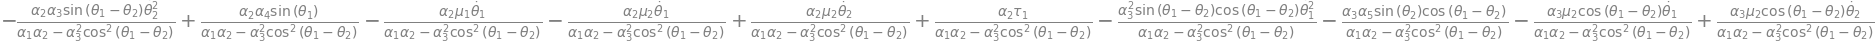

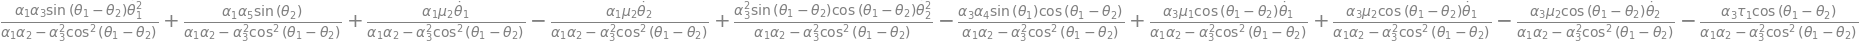

In [10]:
# 連立方程式の解を求める
solutions = sp.solve([eq1, eq2], (theta1_ddot, theta2_ddot))
theta1_ddot_sol = solutions[theta1_ddot]
theta2_ddot_sol = solutions[theta2_ddot]

display(theta1_ddot_sol)
display(theta2_ddot_sol)

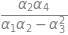

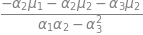

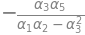

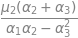

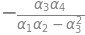

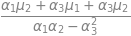

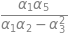

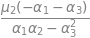

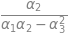

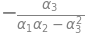

In [11]:
A10 = theta1_ddot_sol.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A11 = theta1_ddot_sol.diff(theta1_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A12 = theta1_ddot_sol.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A13 = theta1_ddot_sol.diff(theta2_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

A30 = theta2_ddot_sol.diff(theta1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A31 = theta2_ddot_sol.diff(theta1_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A32 = theta2_ddot_sol.diff(theta2).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
A33 = theta2_ddot_sol.diff(theta2_dot).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

B00 = theta1_ddot_sol.diff(tau1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])
B30 = theta2_ddot_sol.diff(tau1).subs([(theta1, 0), (theta2, 0), (theta1_dot, 0), (theta2_dot, 0)])

display(A10.simplify())
display(A11.simplify())
display(A12.simplify())
display(A13.simplify())
display(A30.simplify())
display(A31.simplify())
display(A32.simplify())
display(A33.simplify())
display(B00.simplify())
display(B30.simplify())